<a href="https://colab.research.google.com/github/hyunmila/um/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import os
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [25]:

# train_dir = str(main_path)+'/dogs_and_cats_small/train'
# val_dir = str(main_path)+'/dogs_and_cats_small/validate'

train_dir = 'dogs_and_cats_small/train'
val_dir = 'dogs_and_cats_small/validate'

In [16]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [17]:
def create_model():
    model = keras.models.Sequential()
    # model_2.add(data_augmentation)
    # model_2.add(keras.layers.Rescaling(scale=1./255, input_shape=(150,150, 3)))
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

    return model

model_1 = create_model()
# model_1.summary()

In [18]:
epochs = 100

history = model_1.fit(train_generator, epochs=epochs, validation_data=validation_generator)



Epoch 1/100
100/100 [==============================] - 227s 2s/step - loss: 0.6931 - accuracy: 0.5155 - val_loss: 0.6879 - val_accuracy: 0.5910
Epoch 2/100
100/100 [==============================] - 28s 276ms/step - loss: 0.6872 - accuracy: 0.5440 - val_loss: 0.6776 - val_accuracy: 0.5360
Epoch 3/100
100/100 [==============================] - 29s 296ms/step - loss: 0.6821 - accuracy: 0.5595 - val_loss: 0.6667 - val_accuracy: 0.5840
Epoch 4/100
100/100 [==============================] - 28s 284ms/step - loss: 0.6668 - accuracy: 0.5950 - val_loss: 0.6559 - val_accuracy: 0.6175
Epoch 5/100
100/100 [==============================] - 28s 285ms/step - loss: 0.6628 - accuracy: 0.5935 - val_loss: 0.6466 - val_accuracy: 0.6210
Epoch 6/100
100/100 [==============================] - 28s 281ms/step - loss: 0.6541 - accuracy: 0.6060 - val_loss: 0.6458 - val_accuracy: 0.6000
Epoch 7/100
100/100 [==============================] - 28s 277ms/step - loss: 0.6397 - accuracy: 0.6315 - val_loss: 0.6212 - v

In [19]:
history_df = pd.DataFrame(history.history)
with open("history_1.json", mode='w') as f:
    history_df.to_json(f)

In [20]:
data = pd.read_json("history_1.json")

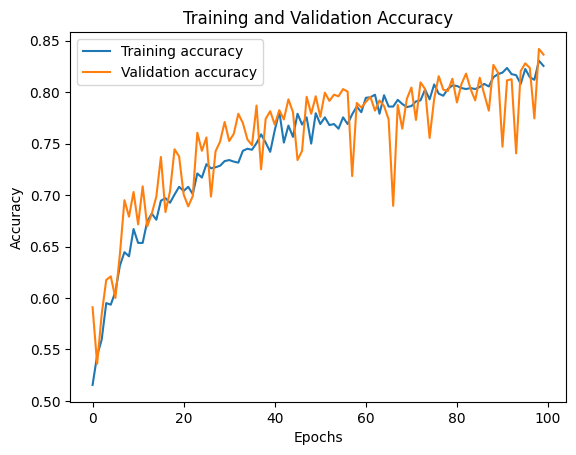

In [23]:
plt.plot(data['accuracy'], label= 'Training accuracy')
plt.plot(data['val_accuracy'], label = 'Validation accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.grid()
# plt.xticks(np.arange(0, int(epochs+1)))
plt.legend(loc='best')
plt.show()